# Project 2 - Food Delivery System using Clustering

## 23AIML064 - Aarya Shah

### Goal : To analyze customer preferences and behavior in food delivery services using exploratory data analysis and clustering techniques to uncover insights about cuisine preferences and customer segmentation.

In [ ]:
# Import essential libraries for data manipulation, visualization, and machine learning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:
# Load the food delivery dataset
df = pd.read_csv("D:\\Data Sets\\food_delivery.csv")
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [5]:
df.shape

(500, 7)

In [6]:
df.drop_duplicates().sum()

UserID                                                           125250
Age                                                               19663
TotalOrders                                                       14857
AverageSpend                                                  153292.34
FavoriteCuisine       MexicanMexicanMexicanThaiItalianMexicanChinese...
DeliveryRating                                                   1879.7
AppUsageTimePerDay                                              46757.7
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,500.0,250.50000,144.481833,1.0,125.750,250.50,375.250,500.00
Age,500.0,39.32600,12.200386,18.0,29.000,41.00,50.000,59.00
TotalOrders,500.0,29.71400,5.747196,14.0,25.000,30.00,33.000,47.00
AverageSpend,500.0,306.58468,74.732407,80.9,256.685,305.17,355.870,539.48
DeliveryRating,500.0,3.75940,0.731794,2.5,3.100,3.80,4.400,5.00
AppUsageTimePerDay,500.0,93.51540,48.472478,10.1,49.325,93.10,137.275,179.90


In [ ]:
# Count values in the 'FavoriteCuisine' column to understand cuisine popularity
df['FavoriteCuisine'].value_counts()

FavoriteCuisine
Thai       108
Italian    106
Indian     104
Mexican     95
Chinese     87
Name: count, dtype: int64

In [24]:
df['FavoriteCuisine'] = df['FavoriteCuisine'].map({'Thai': 0, 'Italian': 1, 'Indian': 2, 'Mexican': 3, 'Chinese': 4})
df['FavoriteCuisine'].value_counts()

FavoriteCuisine
0    108
1    106
2    104
3     95
4     87
Name: count, dtype: int64

In [ ]:
# Compute correlation matrix between numeric features
corr = df.corr()
corr

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
UserID,1.000000,0.043303,0.081743,0.037925,0.022466,0.035729,0.023503
Age,0.043303,1.000000,0.044117,0.009313,0.009549,0.077397,0.041644
TotalOrders,0.081743,0.044117,1.000000,0.033607,-0.041441,-0.025495,-0.037582
AverageSpend,0.037925,0.009313,0.033607,1.000000,-0.134597,-0.056125,-0.065401
FavoriteCuisine,0.022466,0.009549,-0.041441,-0.134597,1.000000,0.017919,0.057123
DeliveryRating,0.035729,0.077397,-0.025495,-0.056125,0.017919,1.000000,0.032841
AppUsageTimePerDay,0.023503,0.041644,-0.037582,-0.065401,0.057123,0.032841,1.000000


<Axes: >

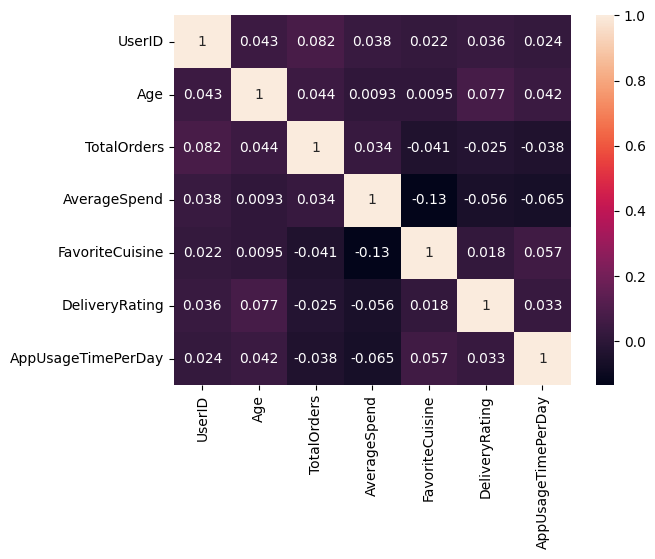

In [28]:
sns.heatmap(corr, annot=True)

Conclusion: Most variables show low to moderate correlation. This suggests relatively independent features which is good for clustering tasks.

In [ ]:
# Drop non-numeric identifier column for modeling
X = df.drop(['UserID'], axis=1)

In [ ]:
# Standardize features to normalize the scale for PCA and clustering
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc.shape

(500, 6)

In [ ]:
# Reduce dimensionality to 2 components for easy visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)
X_pca.shape

(500, 2)

In [ ]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

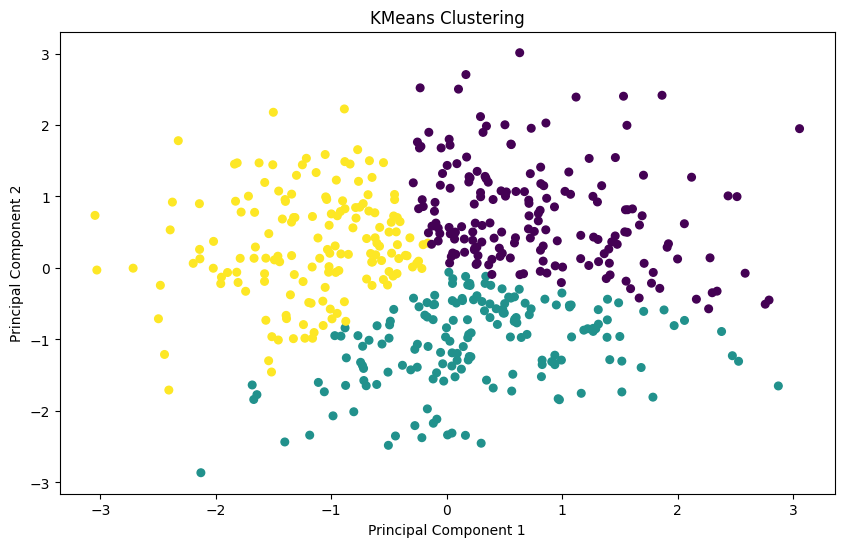

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Conclusion: KMeans clustering effectively forms 3 distinct customer groups based on PCA-reduced features. There's reasonable separation, suggesting usable segmentation.

In [ ]:
# Apply Agglomerative (hierarchical) clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
y_agglo = agglo.fit_predict(X_pca)

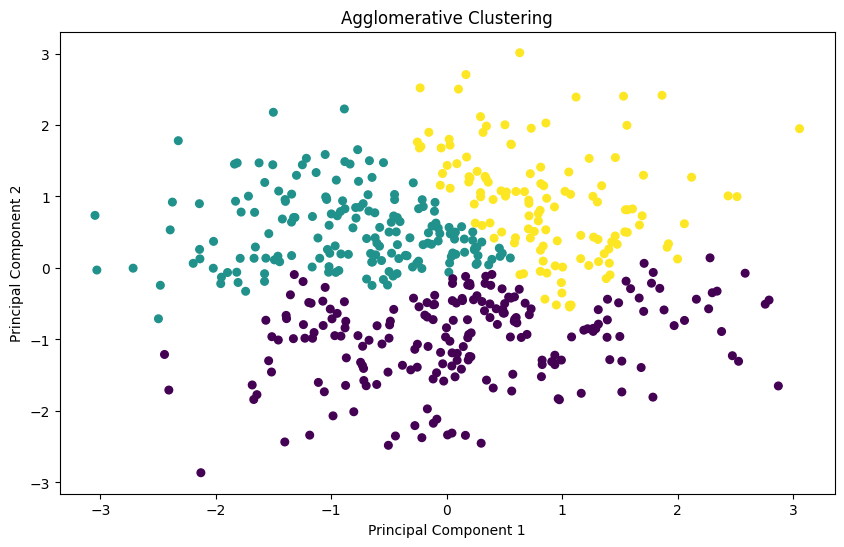

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agglo, cmap='viridis',s=30)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Conclusion: Agglomerative clustering also shows distinct groups with similar structure to KMeans. It confirms the natural grouping tendency in the data.

In [ ]:
# Apply DBSCAN clustering (density-based, good for outlier detection)
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_pca)

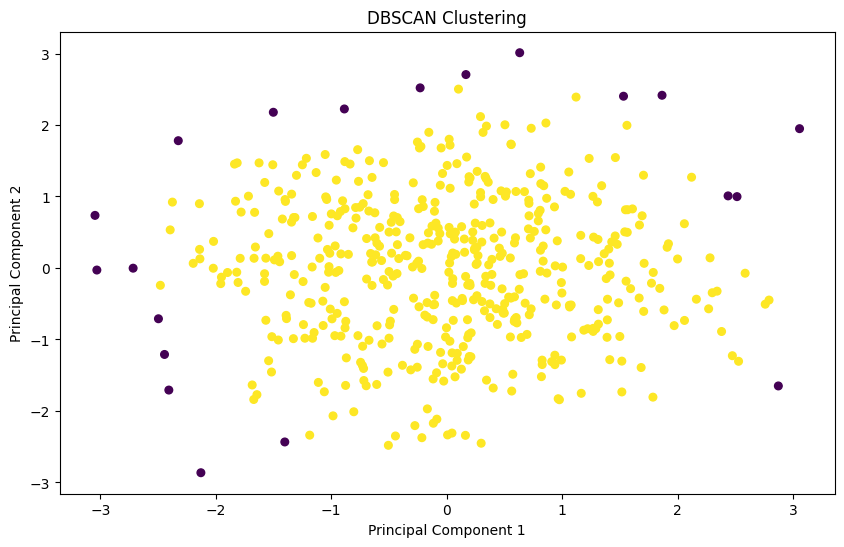

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis', s=30)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Conclusion: DBSCAN detected a few core clusters and treated sparse points as noise. This suggests the presence of outliers or users who don’t fit common patterns.

## Conclusion: 
The analysis and clustering of food delivery customer data revealed meaningful segmentation based on preferences and behaviors. Key findings:

Thai and Italian cuisines are among the most favored.

PCA enabled clear visualization, helping clustering algorithms perform effectively.

KMeans and Agglomerative clustering showed stable and similar clusters.

DBSCAN highlighted outliers, useful for anomaly detection.

This analysis can assist food delivery services in targeted marketing, personalized recommendations, and understanding distinct customer profiles.